<a target="_blank" href="https://colab.research.google.com/github/lucaase/brain-decoding/blob/master/neural_ml_decoding.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

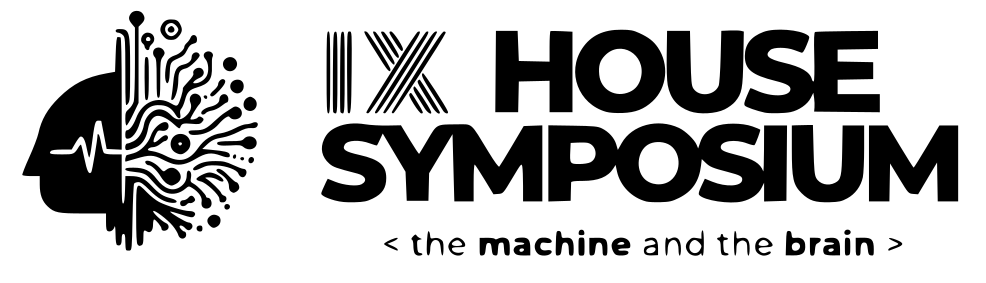

# **Decodificando o cérebro por meio do aprendizado de máquina**

Bem vindos ao IX House Symposium/Workshop Day! Como parte do evento, esse tutorial oferecerá teoria e prática em técnicas de aprendizado de máquina para análise de dados eletrofisiológicos neurais. Os participantes serão apresentados a métodos de redução de dimensionalidade, clusterização e classificação, aplicados na identificação de padrões latentes em dados de alta dimensionalidade.

**Instituto do Cérebro, Universidade Federal do Rio Grande do Norte**

**Tutores**: Lucas CS Tavares (lucastavares@neuro.ufrn.br), Rodrigo MM Santiago (rsantiago@neuro.ufrn.br)

___
# Objetivos do Workshop

*Tempo estimado do tutorial: 2 horas*

Neste tutorial interativo, nossos principais objetivos são capacitar os participantes a explorar e interpretar dados neurais e comportamentais utilizando métodos de aprendizado de máquina. Ao longo da sessão, os participantes praticarão as seguintes áreas:

- **Carregamento e Visualização de Dados**:
    - Aprenda a carregar e visualizar dados neurais (spikes) e comportamentais (contínuos e categóricos).

- **Redução de Dimensionalidade**:
    - Descubra técnicas como PCA, UMAP e CEBRA, entendendo como essas ferramentas transformam dados em representações compactas.
    - Explore a aplicação de aprendizado supervisionado e não supervisionado, incluindo abordagens de clustering.

- **Regressão**:
    - Aprofunde-se em modelos como Regressão Linear, SVMs e Redes Neurais para predizer variáveis contínuas.
    - Veja exemplos práticos, como prever posição a partir de sinais do hipocampo.

- **Classificação**:
    - Explore métodos como Regressão Logística, KNN e Redes Neurais para classificar dados categóricos.

- **Avaliação de Modelos**:
    - Identifique armadilhas comuns em modelos de aprendizado de máquina.
    - Entenda as métricas de desempenho mais utilizadas e saiba quando usar cada uma.
    - Aprenda a interpretar trade-offs de desempenho e visualizar resultados através de gráficos.

<br>

**Créditos:**

- Os dados do hipocampo e algumas seções de código foram adaptadas da seção de tutoriais do [CEBRA](cebra.ai).
- O formato deste notebook foi inspirado nos exemplos da [Neuromatch Academy](https://academy.neuromatch.io).

## Instalação de Pacotes

In [ ]:
!pip install umap-learn
!pip install 'cebra[dev,demos]'

## Importação de Pacotes

In [ ]:
import umap
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import cebra.datasets
from cebra import CEBRA
from sklearn.decomposition import PCA

# Carregamento e Visualização de Dados

Nesta seção, vamos explorar o carregamento de dados neurais e comportamentais, seguido pela visualização inicial para compreender as características principais. 

## Carregando Dados

Começaremos carregando dois tipos principais de dados:

1. **Dados Neurais (Spikes):**
   - Potenciais de ação registrados de múltiplos neurônios do Hipocampo de um rato.

2. **Dados Comportamentais:**
   - Variável contínua: posição do animal ao longo do tempo.
   - Variável discreta: direção do movimento do animal.

In [ ]:
# Carregar o dataset
hippocampus_pos = cebra.datasets.init('rat-hippocampus-single-achilles')

# hippocampus_pos.neural  # Dados de atividade neural
# hippocampus_pos.pos     # Dados de posição

## Visualização de Dados
### Visualizando Spikes e posição do animal
Os spikes são representados como inteiros (contagem de spikes dentro de um bin) associados à atividade dos neurônios ao longo do tempo. Vamos construir um rasterplot para exibir sua distribuição.

In [ ]:
# Visualizando um trecho dos dados

fig = plt.figure(figsize=(9,3), dpi=150)
plt.subplots_adjust(wspace = 0.3)
ax = plt.subplot(121)
ax.imshow(hippocampus_pos.neural.numpy()[:1000].T, aspect = 'auto', cmap = 'gray_r')
plt.ylabel('Neurônio ')
plt.xlabel('Tempo [s]')
plt.xticks(np.linspace(0, 1000, 5), np.linspace(0, 0.025*1000, 5, dtype = int))

ax2 = plt.subplot(122)
ax2.scatter(np.arange(1000), hippocampus_pos.continuous_index[:1000,0], c = 'gray', s=1)
plt.ylabel('Posição [m]')
plt.xlabel('Tempo [s]')
plt.xticks(np.linspace(0, 1000, 5), np.linspace(0, 0.025*1000, 5, dtype = int))
plt.show()

# Redução de Dimensionalidade e Padrões Latentes

A redução de dimensionalidade é fundamental para explorar padrões latentes em dados de alta dimensionalidade. Métodos como **PCA**, **UMAP** e **CEBRA** podem ser utilizados para simplificar e interpretar dados neurais.

### Métodos:
- **PCA**: Reduz a dimensionalidade destacando componentes principais que explicam a maior variabilidade nos dados.
- **UMAP**: Projeta dados complexos em dimensões mais baixas, mantendo relações locais entre pontos.
- **CEBRA**: Integra dados supervisionados ou não-supervisionados para identificar padrões latentes que refletem comportamentos ou condições específicas.

### Exploração:
Vamos aplicar esses métodos para:
- Comparar aprendizado supervisionado e não supervisionado.
- Explorar agrupamentos e trajetórias em dados neurais de múltiplas regiões.

---

In [ ]:
# Do PCA scree plot for the neural data
pca = PCA()
pca.fit(hippocampus_pos.neural.numpy())

fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

# Plot the classic scree plot with eigenvalues
axes[0].plot(pca.explained_variance_)
axes[0].set_xlabel('Número de componentes')
axes[0].set_ylabel('Eigenvalues')
axes[0].set_title('PCA scree plot (Eigenvalues)')

# Plot the cumulative explained variance
axes[1].plot(np.cumsum(pca.explained_variance_ratio_))
axes[1].set_xlabel('Número de componentes')
axes[1].set_ylabel('Variância explicada acumulada')
axes[1].set_title('PCA (Variância explicada acumulada)')

plt.tight_layout()
plt.show()

In [ ]:
# Applicando PCA nos dados neurais
pca = PCA(n_components=2)
pca_hippocampus = pca.fit_transform(hippocampus_pos.neural.numpy())


fig, ax = plt.subplots(1, 2, figsize=(20,10))

sc1 = ax[0].scatter(pca_hippocampus[:,0], pca_hippocampus[:,1], c=hippocampus_pos.continuous_index[:,0], cmap='viridis')
ax[0].set_title('PCA - Posição [m]')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('PCA2')
cbar1 = plt.colorbar(sc1, ax=ax[0])
cbar1.set_label('Posição [m]')

sc2 = ax[1].scatter(pca_hippocampus[:,0], pca_hippocampus[:,1], c=hippocampus_pos.continuous_index[:,1], cmap='seismic')
ax[1].set_title('PCA - Direção')
ax[1].set_xlabel('PCA1')
ax[1].set_ylabel('PCA2')
cbar2 = plt.colorbar(sc2, ax=ax[1])
cbar2.set_label('Direção')

plt.show()

## Aplicando UMAP: Mapas de Aproximação Uniforme
O UMAP é um método não linear que preserva tanto as estruturas globais quanto locais dos dados, sendo ideal para visualizações mais complexas.

## Implementação do UMAP em Dados Comportamentais
Vamos aplicar UMAP aos dados comportamentais, incluindo a velocidade e os estados discretos, para identificar padrões entre os estados comportamentais.

In [ ]:
# Aplicando UMAP nos dados neurais

# UMAP não supervisionado
umap_hippocampus = umap.UMAP(n_components=2).fit_transform(hippocampus_pos.neural.numpy())

# UMAP supervisionado (com as labels de posição)
# umap_hippocampus = umap.UMAP(n_components=2).fit_transform(hippocampus_pos.neural.numpy(), y=hippocampus_pos.continuous_index[:,0])

# UMAP supervisionado (com as labels de direção)
# umap_hippocampus = umap.UMAP(n_components=2).fit_transform(hippocampus_pos.neural.numpy(), y=hippocampus_pos.continuous_index[:,1])

fig, ax = plt.subplots(1, 2, figsize=(20,10))

sc1 = ax[0].scatter(umap_hippocampus[:,0], umap_hippocampus[:,1], c=hippocampus_pos.continuous_index[:,0], cmap='viridis')
ax[0].set_title('UMAP - Posição [m]')
ax[0].set_xlabel('UMAP1')
ax[0].set_ylabel('UMAP2')
cbar1 = plt.colorbar(sc1, ax=ax[0])
cbar1.set_label('Position [m]')
cbar1.set_ticks(np.linspace(0, 1, 5))

sc2 = ax[1].scatter(umap_hippocampus[:,0], umap_hippocampus[:,1], c=hippocampus_pos.continuous_index[:,1], cmap='seismic')
ax[1].set_title('UMAP - Direção')
ax[1].set_xlabel('UMAP1')
ax[1].set_ylabel('UMAP2')
cbar2 = plt.colorbar(sc2, ax=ax[1])
cbar2.set_label('Direction')
cbar2.set_ticks(np.linspace(0, 1, 5))

plt.show()

## Comparando PCA e UMAP
PCA: Ideal para entender a variância explicada e realizar análises iniciais em dados lineares.

UMAP: Melhor para preservar relações não lineares e detectar agrupamentos locais e globais.


In [ ]:
# Visualizando Resultados Lado a Lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA
axes[0].scatter(pca_hippocampus[:, 0], pca_hippocampus[:, 1], c=hippocampus_pos.continuous_index[:, 1], cmap='viridis', s=10, alpha=0.8)
axes[0].set_title('Projeção com PCA')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')

# UMAP
axes[1].scatter(umap_hippocampus[:, 0], umap_hippocampus[:, 1], c=hippocampus_pos.continuous_index[:, 1], cmap='viridis', s=10, alpha=0.8)
axes[1].set_title('Projeção com UMAP')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()

## CEBRA

In [75]:
max_iterations = 10000 #default is 5000.

cebra_params = {
    'model_architecture': 'offset10-model',
    'batch_size': 512,
    'learning_rate': 3e-4,
    'temperature': 1,
    'output_dimension': 3,
    'max_iterations': max_iterations,
    'distance': 'cosine',
    'conditional': 'time_delta',
    'device': 'cuda_if_available',
    'verbose': True,
    'time_offsets': 10
}

In [76]:
cebra_pos_model = CEBRA(**cebra_params)
cebra_dir_model = CEBRA(**cebra_params)
cebra_posdir_model = CEBRA(**cebra_params)

cebra_pos_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index[:, 0])
cebra_pos = cebra_pos_model.transform(hippocampus_pos.neural)

cebra_dir_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index[:, 1])
cebra_dir = cebra_dir_model.transform(hippocampus_pos.neural)

cebra_posdir_model.fit(hippocampus_pos.neural, hippocampus_pos.continuous_index)
cebra_posdir = cebra_posdir_model.transform(hippocampus_pos.neural)

pos: -0.8909 neg:  6.4889 total:  5.5980 temperature:  1.0000: 100%|██████████| 10000/10000 [02:03<00:00, 80.86it/s]
pos: -0.7955 neg:  6.5242 total:  5.7287 temperature:  1.0000: 100%|██████████| 10000/10000 [02:04<00:00, 80.11it/s]
pos: -0.9101 neg:  6.4193 total:  5.5091 temperature:  1.0000: 100%|██████████| 10000/10000 [02:09<00:00, 77.04it/s]


In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(231, projection='3d')
ax2 = plt.subplot(232, projection='3d')
ax3 = plt.subplot(233, projection='3d')


ax1.set_title('position only')
ax2.set_title('direction only')
ax3.set_title('position+direction')

# Add colorbars
sc1 = ax1.scatter(cebra_pos[:, 0], cebra_pos[:, 1], cebra_pos[:, 2], c=hippocampus_pos.continuous_index[:, 0], cmap='viridis', s=2)
sc2 = ax2.scatter(cebra_dir[:, 0], cebra_dir[:, 1], cebra_dir[:, 2], c=hippocampus_pos.continuous_index[:, 1], cmap='seismic', s=2)
sc3 = ax3.scatter(cebra_posdir[:, 0], cebra_posdir[:, 1], cebra_posdir[:, 2], c=hippocampus_pos.continuous_index[:, 0], cmap='viridis', s=2)

for ax in [ax1, ax2, ax3]:
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

fig.colorbar(sc1, ax=ax1, shrink=0.5, aspect=5)
fig.colorbar(sc2, ax=ax2, shrink=0.5, aspect=5)
fig.colorbar(sc3, ax=ax3, shrink=0.5, aspect=5)

plt.show()

# Regressão

A regressão é uma abordagem para prever variáveis contínuas. No nosso caso, essa predição será baseada nos dados neurais. Métodos como Regressão Linear, SVMs e Redes Neurais são particularmente úteis neste tipo de aplicação.

## Métodos:
- **Regressão Linear**: Simplicidade e interpretabilidade para relações lineares.
- **SVMs**: Modelos robustos para previsões em espaços de alta dimensionalidade.
- **Redes Neurais**: Flexibilidade para capturar relações complexas nos dados.

### O Problema

Queremos prever a posição de um animal em uma arena linear com base na atividade de múltiplos neurônios. O objetivo é entender como a representação neural captura informações espaciais.

### Por que Regressão?

Regressão é usada para:
- Prever valores contínuos.
- Avaliar a relação entre variáveis independentes (atividade neural) e uma dependente (posição).

---


### Dividindo os Dados

Para efetuar a decodificação, dividiremos os dados em conjuntos de treino e teste. Isso nos permitirá avaliar o desempenho dos modelos de aprendizado de máquina em dados não vistos.

In [ ]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = data.neural[:split_idx]
    neural_test = data.neural[split_idx:]
    label_train = data.continuous_index[:split_idx]
    label_test = data.continuous_index[split_idx:]

    return neural_train.numpy(), neural_test.numpy(), label_train.numpy(), label_test.numpy()

neural_train, neural_test, label_train, label_test = split_data(hippocampus_pos, 0.2)

### Visualizando Dados de Treino e Teste

Vamos criar gráficos para variáveis comportamentais contínuas (velocidade) e discretas (direção).

In [ ]:
# Dados de treino

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10), sharex=True)

for i in range(neural_train.shape[1]):
    spike_times = np.where(neural_train[:,i] > 0)[0]
    ax1.eventplot(spike_times, lineoffsets=i, colors='black')

ax1.set_ylabel('Neurônio')
ax1.set_title('Dados de disparo neuronal')
# invert y-axis
ax1.set_ylim(neural_train.shape[1], 0)

ax2.plot(label_train[:,0], color='black')
ax2.fill_between(range(len(label_train)), label_train[:,0], where=label_train[:,2]==1, color='red', alpha=0.5)
ax2.fill_between(range(len(label_train)), label_train[:,0], where=label_train[:,1]==1, color='blue', alpha=0.5)
ax2.set_xlabel('Tempo [s]')
ax2.set_ylabel('Posição [m]')
ax2.set_title('Labels')
plt.legend(['Posição', 'Indo', 'Voltando'])

ax2.set_xticks(np.linspace(0, len(label_train), 5))
ax2.set_xticklabels(np.round(np.linspace(0, len(label_train), 5) / 100, 2))

plt.show()

In [ ]:
# Dados de teste

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10), sharex=True)

for i in range(neural_test.shape[1]):
    spike_times = np.where(neural_test[:,i] > 0)[0]
    ax1.eventplot(spike_times, lineoffsets=i, colors='black')
    
ax1.set_ylabel('Neurônio')
ax1.set_title('Dados de disparo neuronal')
# invert y-axis
ax1.set_ylim(neural_test.shape[1], 0)

ax2.plot(label_test[:,0], color='black')
ax2.fill_between(range(len(label_test)), label_test[:,0], where=label_test[:,2]==1, color='red', alpha=0.5)
ax2.fill_between(range(len(label_test)), label_test[:,0], where=label_test[:,1]==1, color='blue', alpha=0.5)
ax2.set_xlabel('Tempo [s]')
ax2.set_ylabel('Posição [m]')
ax2.set_title('Labels')
plt.legend(['Posição', 'Esquerda', 'Direita'])

ax2.set_xticks(np.linspace(0, len(label_test), 5))
ax2.set_xticklabels(np.round(np.linspace(0, len(label_test), 5) / 100, 2))

plt.show()

## Aplicando Regressão Linear

Começamos com um modelo simples de regressão linear para prevermos a posição do animal no linear track.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Modelo de regressão linear para os dados de posição
linear_model = LinearRegression()
linear_model.fit(neural_train, label_train[:, 0])

# Predição
y_pred = linear_model.predict(neural_test)

# Avaliação
mse = mean_squared_error(label_test[:, 0], y_pred)
print(f"Erro Médio Quadrado (MSE): {mse}")

# give me the median error in cm
print(f"Erro mediano de posição: {np.median(np.abs(label_test[:, 0] - y_pred)) * 100} cm")

# Visualizando a posição real vs predita
plt.figure(figsize=(10, 6))
plt.plot(label_test[:, 0], label='Posição Real', color='black', linewidth=2)
plt.plot(y_pred, label='Posição Predita', color='red', linestyle='--', alpha=0.5)
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.title("Posição Real vs Predita (Regressão Linear)")
plt.ylim(-1, 2.5)
plt.legend()
plt.xticks(ticks=np.linspace(0, len(label_test), 5), labels=np.round(np.linspace(0, len(label_test), 5) / 100, 2))
plt.show()

## Aplicando SVM para Regressão

O SVM para regressão (SVR) permite capturar relações não lineares nos dados.

In [ ]:
from sklearn.svm import SVR

# Modelo de regressão com SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(neural_train, label_train[:, 0])

# Predição e Avaliação
y_pred_svr = svr_model.predict(neural_test)
mse_svr = mean_squared_error(label_test[:, 0], y_pred_svr)
print(f"Erro Médio Quadrado (MSE - SVR): {mse_svr}")
print(f"Erro mediano de posição (SVR): {np.median(np.abs(label_test[:, 0] - y_pred_svr)) * 100} cm")

# Visualização
plt.figure(figsize=(10, 6))
plt.plot(label_test[:, 0], label='Posição Real', color='black', linewidth=2)
plt.plot(y_pred_svr, label='Posição Predita (SVR)', color='red', linestyle='--', alpha=0.5)
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.title("Posição Real vs Predita (SVR)")
plt.ylim(-1, 2.5)
plt.legend()
plt.xticks(ticks=np.linspace(0, len(label_test), 5), labels=np.round(np.linspace(0, len(label_test), 5) / 100, 2))

plt.show()

## Usando Redes Neurais

Modelos de redes neurais podem capturar relações complexas nos dados.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Modelo de regressão com MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_model.fit(neural_train, label_train[:, 0])

# Predição e Avaliação
y_pred_mlp = mlp_model.predict(neural_test)
mse_mlp = mean_squared_error(label_test[:,0], y_pred_mlp)
print(f"Erro Médio Quadrado (MSE - MLP): {mse_mlp}")
print(f"Erro mediano de posição (MLP): {np.median(np.abs(label_test[:, 0] - y_pred_mlp)) * 100} cm")

# Visualização
plt.figure(figsize=(10, 6))
plt.plot(label_test[:, 0], label='Posição Real', color='black', linewidth=2)
plt.plot(y_pred_mlp, label='Posição Predita (MLP)', color='red', linestyle='--', alpha=0.5)
plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.title("Posição Real vs Predita (MLP)")
plt.ylim(-1, 2.5)
plt.legend()
plt.xticks(ticks=np.linspace(0, len(label_test), 5), labels=np.round(np.linspace(0, len(label_test), 5) / 100, 2))
plt.show()

## Usando CEBRA

In [ ]:
# Train CEBRA-Behavior models with position variable.
cebra_pos_model = CEBRA(**cebra_params)
cebra_pos_model.fit(neural_train, label_train[:, 0])
embedding_train = cebra_pos_model.transform(neural_train)
embedding_test = cebra_pos_model.transform(neural_test)

pos_decoder = cebra.KNNDecoder(n_neighbors=36, metric="cosine")
pos_decoder.fit(embedding_train, label_train[:,0])
pos_pred = pos_decoder.predict(embedding_test)

pos_test_err = np.median(abs(pos_pred - label_test[:, 0]))
pos_mse = sklearn.metrics.mean_squared_error(label_test[:, 0], pos_pred)

In [ ]:
# mostrar os resultados
print(f"Erro mediano de posição (CEBRA): {pos_test_err * 100} cm")
print(f"Erro Médio Quadrado (MSE - CEBRA): {pos_mse}")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(label_test[:, 0], label='Posição Real', color='black', linewidth=2)
ax.plot(pos_pred, label='Posição Predita', color='red', linestyle='--', alpha=0.5)
ax.set_xlabel("Tempo (s)")
ax.set_ylabel("Posição (m)")
ax.set_title("Posição Real vs Predita")
ax.legend()
ax.set_ylim(-1, 2.5)
ax.set_xticks(ticks=np.linspace(0, len(label_test), 5), labels=np.round(np.linspace(0, len(label_test), 5) / 100, 2))
plt.show()

### Comparando Modelos de Regressão

Nesta subseção, analisamos os resultados obtidos por cada modelo para prever a posição do animal na arena, comparando desempenho e limitações.

#### Resumo dos Resultados

| Modelo          | Erro mediano (cm) |
|------------------|---------------------------|
| Regressão Linear | `28.456`                  |
| SVR             | `25.979`                  |
| MLP             | `17.421`                  |
| CEBRA           | `07.351`                  |

#### Análise e Observações

1. **Regressão Linear:**
   - **Prós:** Simples e rápido de implementar.
   - **Contras:** Desempenho limitado em capturar padrões complexos, especialmente em dados com relações não lineares.

2. **SVR (Regressão com SVM):**
   - **Prós:** Eventualmente eficaz para padrões não lineares.
   - **Contras:** Alto custo computacional, sensível à escolha de hiperparâmetros como `C` e `gamma`.

3. **MLP (Rede Neural):**
   - **Prós:** Maior flexibilidade para capturar relações complexas.
   - **Contras:** Requer mais dados e ajustes cuidadosos para evitar overfitting.

4. **CEBRA:**
   - **Prós:** Combinação de métodos supervisionados e não supervisionados para capturar padrões latentes.
   - **Contras:** Maior dos custos computacionais, requer mais dados e ajustes para evitar overfitting.


# Classificação: Abordagens e Desafios em Dados Reais

A classificação permite separar dados categóricos em grupos distintos. Modelos como Regressão Logística, KNN e Redes Neurais são adequados para explorar esse tipo de dado comportamental.

### Métodos:
- **Regressão Logística**: Uma abordagem eficiente para tarefas binárias e multiclasse.
- **KNN**: Um método intuitivo baseado na proximidade dos dados no espaço.
- **Redes Neurais**: Capacidade de identificar padrões em dados complexos.

### Aplicação:
- Análise de dados hipocampais para prever um comportamento.
- Exploração dos impactos de vieses e seleção de dados nos resultados.

---

## O Problema

Queremos prever a direção do movimento do animal com base na atividade neural. O objetivo é entender como a representação neural reflete estados comportamentais.

### Por que Classificação?

Classificação permite:
- Categorizar estados discretos a partir de dados neurais.
- Avaliar a precisão de modelos baseados em métricas como acurácia e F1-score.

---

## Carregando e Preprocessando os Dados

Os dados incluem:
- **Atividade neural:** Matriz `disparos x tempo`.
- **Comportamentos:** Labels categóricos representando a direção.


## Aplicando Classificadores

### 1. Regressão Logística

In [ ]:
# Visualizando a proporção de cada classe
print("Proporção de cada classe:")
print("Indo: {:.2f}%".format(np.sum(label_train[:, 1] == 1) / len(label_train) * 100))
print("Voltando: {:.2f}%".format(np.sum(label_train[:, 2] == 1) / len(label_train) * 100))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Modelo de Regressão Logística
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(neural_train, label_train[:, 1])

# Avaliação
y_pred_log = log_model.predict(neural_test)
print(classification_report(label_test[:,1], y_pred_log, target_names=['Indo', 'Voltando']))
# Visualização (Matriz de Confusão)
cm = confusion_matrix(label_test[:,1], y_pred_log)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Labels preditos')
plt.ylabel('Labels reais')
plt.xticks([0, 1], ['Indo', 'Voltando'])
plt.yticks([0, 1], ['Indo', 'Voltando'])
plt.title('Matriz de Confusão')
# Mostrar porcentagens dentro dos quadrados
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j] / cm[i].sum():.2%}', ha='center', va='center', color='black')

plt.show()

### 2. SVM para Classificação

In [ ]:
from sklearn.svm import SVC

# Modelo de SVM
svm_model = SVC(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(neural_train, label_train[:, 1])

# Avaliação
y_pred_svm = svm_model.predict(neural_test)
print(classification_report(label_test[:,1], y_pred_svm, target_names=['Indo', 'Voltando']))
# Visualização (Matriz de Confusão)
cm = confusion_matrix(label_test[:,1], y_pred_svm)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Labels preditos')
plt.ylabel('Labels reais')
plt.xticks([0, 1], ['Indo', 'Voltando'])
plt.yticks([0, 1], ['Indo', 'Voltando'])
plt.title('Matriz de Confusão')
# Mostrar porcentagens dentro dos quadrados
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j] / cm[i].sum():.2%}', ha='center', va='center', color='black')
        
plt.show()

### 3. Redes Neurais

In [ ]:
from sklearn.neural_network import MLPClassifier

# Modelo de MLP para classificação
mlp_model = MLPClassifier(hidden_layer_sizes=(5, 10), max_iter=1000, random_state=42)
mlp_model.fit(neural_train, label_train[:, 1])

# Avaliação
y_pred_mlp = mlp_model.predict(neural_test)
print(classification_report(label_test[:,1], y_pred_mlp, target_names=['Indo', 'Voltando']))
# Visualização (Matriz de Confusão)
cm = confusion_matrix(label_test[:,1], y_pred_mlp)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Labels preditos')
plt.ylabel('Labels reais')
plt.xticks([0, 1], ['Indo', 'Voltando'])
plt.yticks([0, 1], ['Indo', 'Voltando'])
plt.title('Matriz de Confusão')

# Mostrar porcentagens dentro dos quadrados
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j] / cm[i].sum():.2%}', ha='center', va='center', color='black')

plt.show()

## 4. CEBRA

In [135]:
# Train CEBRA-Behavior models with position variable.
cebra_dir_model = CEBRA(**cebra_params)
cebra_dir_model.fit(neural_train, label_train[:, 1])
embedding_train = cebra_dir_model.transform(neural_train)
embedding_test = cebra_dir_model.transform(neural_test)

pos: -0.8075 neg:  6.5278 total:  5.7203 temperature:  1.0000: 100%|██████████| 10000/10000 [02:05<00:00, 79.39it/s]


In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# train a KNN classifier
KNN = KNeighborsClassifier(n_neighbors=36, metric="cosine")
KNN.fit(embedding_train, label_train[:, 1])
dir_pred = KNN.predict(embedding_test)

# Avaliação
print(classification_report(label_test[:,1], dir_pred, target_names=['Indo', 'Voltando']))
# Visualização (Matriz de Confusão)
cm = confusion_matrix(label_test[:,1], dir_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Labels preditos')
plt.ylabel('Labels reais')
plt.xticks([0, 1], ['Indo', 'Voltando'])
plt.yticks([0, 1], ['Indo', 'Voltando'])
plt.title('Matriz de Confusão')

# Mostrar porcentagens dentro dos quadrados
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j] / cm[i].sum():.2%}', ha='center', va='center', color='black')

plt.show()


### Comparando Modelos de Classificação

#### Resumo dos Resultados

| Modelo                | Acurácia   | F1-Score Médio |
|-----------------------|------------|----------------|
| Regressão Logística   | `0.77`     | `0.76`         |
| SVM                  | `0.73`     | `0.73`         |
| MLP                  | `0.76`     | `0.75`         |
| CEBRA                | `0.87`     | `0.87`         |

#### Análise de Desempenho

1. **Regressão Logística:**
   - **Pontos Fortes:** 
     - Simplicidade de implementação.
     - Adequado para problemas lineares ou semi-lineares.
   - **Limitações:** 
     - Dificuldade em modelar fronteiras de decisão mais complexas.

2. **SVM:**
   - **Pontos Fortes:** 
     - Normalmente tem bom desempenho para padrões não lineares.
   - **Limitações:** 
     - Elevado custo computacional, se saiu pior que a solução mais simples.

3. **MLP (Rede Neural):**
   - **Pontos Fortes:** 
     - Maior flexibilidade para capturar padrões complexos.
   - **Limitações:** 
     - Necessidade de maior ajuste de hiperparâmetros e cuidado com overfitting.

4. **CEBRA:**
    - **Pontos Fortes:** 
      - Desempenho melhor em relação aos modelos tradicionais.
    - **Limitações:** 
      - Maior custo computacional, requer mais dados e ajustes para evitar overfitting.

# Avaliação de Modelos: Métricas, Armadilhas e Trade-offs

A avaliação adequada dos modelos de aprendizado de máquina é crucial para garantir a confiabilidade das análises. Vamos explorar métricas de desempenho, armadilhas comuns e como equilibrar trade-offs.

### Aspectos:
- **Métricas de desempenho**: Como acurácia, F1-score, AUC e erros absolutos médios são usados.
- **Armadilhas comuns**: Overfitting, seleção de variáveis inadequadas e dados enviesados.
- **Trade-offs e visualização**: Gráficos de curvas ROC, precisão-revocação e análise de custo-benefício entre complexidade e desempenho.


## Por Que Avaliar Modelos?

A avaliação rigorosa de modelos é crucial para:
- Garantir a validade dos resultados.
- Identificar limitações e oportunidades de melhoria.
- Comparar modelos de forma justa e transparente.

---

## Métricas Comuns de Avaliação

1. **Acurácia:**
   - Proporção de previsões corretas sobre o total de exemplos.
   - **Limitação:** Não é adequada para conjuntos de dados desbalanceados.

2. **Precisão, Recall e F1-Score:**
   - **Precisão:** Proporção de exemplos positivos verdadeiros entre os previstos como positivos.
   - **Recall:** Proporção de exemplos positivos verdadeiros entre todos os positivos reais.
   - **F1-Score:** Média harmônica entre precisão e recall; útil para dados desbalanceados.

---

3. **Curvas ROC e AUC:**
   - Representam a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) para diferentes limiares.
   - **AUC:** Área sob a curva ROC; quanto maior, melhor o modelo.

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculando e plotando curva ROC
fpr, tpr, thresholds = roc_curve(label_test[:,1], KNN.predict_proba(embedding_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.legend(loc="lower right")
plt.show()

## Validação Cruzada

A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo em diferentes conjuntos de dados. Vamos aplicar essa técnica para avaliar a acurácia de um modelo de classificação.

In [ ]:
# Dividir os dados em treino e teste, 5 folds
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

kf = KFold(n_splits=5)

# Dados de treino
X = hippocampus_pos.neural.numpy()
y = hippocampus_pos.continuous_index[:, 1]

# Treinando o modelo de regressão logística
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_f1_scores = []
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    log_model.fit(X_train, y_train)
    y_pred = log_model.predict(X_test)
    log_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Resultados
print(f"F1-Score médio (Regressão Logística): {np.mean(log_f1_scores):.2f}")
print(f"Desvio padrão (Regressão Logística): {np.std(log_f1_scores):.2f}")

# Todos os f1-scores
print(log_f1_scores)



## Armadilhas Comuns

1. **Overfitting e Underfitting:**
   - Overfitting normalmente ocorre quando o modelo memoriza os dados de treino.
   - Underfitting normalmente ocorre quando o modelo não aprende o suficiente para generalizar.

2. **Conjuntos de Dados Desbalanceados:**
   - Modelos podem enviesar para a classe majoritária.
   - Soluções incluem reamostragem (oversampling/undersampling) e uso de métricas como F1-Score.

3. **Escolha de Métricas Inadequadas:**
   - Usar apenas acurácia pode ser enganoso, especialmente em cenários desbalanceados.

---

## Trade-offs em Modelos

1. **Complexidade vs. Generalização:**
   - Modelos simples (ex: Regressão Linear) são rápidos, mas podem não capturar padrões complexos.
   - Modelos complexos (ex: Redes Neurais) têm maior capacidade, mas exigem mais dados e recursos computacionais. Também são mais propensos a overfitting.

2. **Bias-Variance Trade-off:**
   - Bias alto leva ao underfitting.
   - Variância alta pode causar overfitting.

---


# Sumário e Conclusões

Neste workshop, exploramos técnicas essenciais para análise de dados neurais, incluindo carregamento, visualização, redução de dimensionalidade, regressão, classificação e avaliação de modelos. Com isso, cobrimos um pipeline completo para extrair codificações de dados de alta dimensionalidade.

## Principais Aprendizados:

1. **Carregamento e Visualização de Dados:**
   - Aprendemos a carregar, visualizar e interpretar dados neurais e comportamentais.

2. **Redução de Dimensionalidade:**
   - Aplicamos métodos como PCA, UMAP e CEBRA para simplificar dados de alta dimensionalidade, explorando padrões latentes e trajetórias neurais.

3. **Regressão Aplicada a Dados Neurais:**
   - Utilizamos modelos como Regressão Linear, SVMs e Redes Neurais para prever variáveis contínuas.

4. **Classificação de Dados Comportamentais:**
   - Exploramos algoritmos como Regressão Logística, KNN e Redes Neurais para classificar comportamentos, abordando a influência de viés e seleção de dados.

5. **Avaliação de Modelos:**
   - Investigamos métricas de desempenho, como acurácia e F1-score, e discutimos armadilhas comuns em modelos de aprendizado de máquina, além de trade-offs entre complexidade e desempenho.

### Próximos Passos:
- Experimente aplicar essas técnicas em novos conjuntos de dados, teste métodos adicionais de aprendizado de máquina e refine a interpretação dos modelos para contextos específicos.


---
# Material Complementar

## Repositórios de Dados Abertos:

- [CRCNS](crcns.org)
- [IBL's Brainwide Map](https://www.internationalbrainlab.com/data)
- [Zenodo](https://zenodo.org)
- [figshare](figshare.com)
- [Dryad](https://datadryad.org/stash)
- [Google Dataset Search](https://datasetsearch.research.google.com)

## Recursos da comunidade aberta na neurociência:

- [List of Neuroscience Databases](en.wikipedia.org/wiki/List_of_neuroscience_databases)
- [NeuralEnsemble](http://neuralensemble.org)
- [Open Computational Neuroscience Resources](https://github.com/asoplata/open-computational-neuroscience-resources)

## Leitura complementar:
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Ferramenta de visualização da curva ROC-AUC:
- [ROC-AUC Plotter](https://kennis-research.shinyapps.io/ROC-Curves/)

